## 🧾 Event data

This notebook:
- 📥 Load your events file
- 📊 Show quick statistics
- 📈 Plot a couple of metrics over time
- 🚦 Detect basic state changes (start/stop/error)
- 🚨 List simple alarm rows

> Expected columns (examples): `timestamp, machine_id, temperature, vibration, humidity, pressure, energy_consumption, machine_status, anomaly_flag, predicted_remaining_life, failure_type, downtime_risk, maintenance_required`  

### ⚙️ Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Larger plots
plt.rcParams['figure.figsize'] = (9, 5)

### 📥 Load data (single line)

In [2]:
df = pd.read_csv("data/historical/historical_record.csv")

# Optional: parse timestamp column
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
print("Rows x Cols:", df.shape)
df.head()

Rows x Cols: (100000, 13)


,timestamp,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,failure_type,downtime_risk,maintenance_required
0,2025-01-01 00:00:00,39,78.61,28.65,79.96,3.73,2.16,1,0,106,Normal,0.0,0
1,2025-01-01 00:01:00,29,68.19,57.28,35.94,3.64,0.69,1,0,320,Normal,0.0,0
2,2025-01-01 00:02:00,15,98.94,50.20,72.06,1.00,2.49,1,1,19,Normal,1.0,1
3,2025-01-01 00:03:00,43,90.91,37.65,30.34,3.15,4.96,1,1,10,Normal,1.0,1
4,2025-01-01 00:04:00,8,72.32,40.69,56.71,2.68,0.63,2,0,65,Vibration Issue,0.0,1


### 📊 Quick statistics

In [3]:
# Show dtypes
print("\nDtypes:\n", df.dtypes)

# Numeric stats
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if num_cols:
    display(df[num_cols].describe().T)

# Simple categorical summaries (common fields)
for col in ['failure_type','machine_status','anomaly_flag','downtime_risk','maintenance_required']:
    if col in df.columns:
        print(f"\nValue counts for {col}:") 
        print(df[col].value_counts(dropna=False).head(10))



Dtypes:
 timestamp                   datetime64[ns]
machine_id                           int64
temperature                        float64
vibration                          float64
humidity                           float64
pressure                           float64
energy_consumption                 float64
machine_status                       int64
anomaly_flag                         int64
predicted_remaining_life             int64
failure_type                        object
downtime_risk                      float64
maintenance_required                 int64
dtype: object


,count,mean,std,min,25%,50%,75%,max
machine_id,100000.0,25.499330,14.389439,1.00,13.0000,25.00,38.00,50.00
temperature,100000.0,75.015625,10.031884,35.55,68.2675,75.06,81.75,121.94
vibration,100000.0,50.012270,14.985444,-17.09,39.9700,49.96,60.10,113.80
humidity,100000.0,54.995401,14.437960,30.00,42.5200,54.98,67.50,80.00
pressure,100000.0,3.000405,1.152399,1.00,2.0000,3.01,4.00,5.00
energy_consumption,100000.0,2.747064,1.297865,0.50,1.6300,2.74,3.87,5.00
machine_status,100000.0,1.002050,0.446193,0.00,1.0000,1.00,1.00,2.00
anomaly_flag,100000.0,0.089160,0.284976,0.00,0.0000,0.00,0.00,1.00
predicted_remaining_life,100000.0,234.269160,150.063062,1.00,97.0000,230.00,365.00,499.00
downtime_risk,100000.0,0.089155,0.284961,0.00,0.0000,0.00,0.00,1.00



Value counts for failure_type:
failure_type
Normal              91899
Vibration Issue      3129
Overheating          1989
Pressure Drop        1969
Electrical Fault     1014
Name: count, dtype: int64

Value counts for machine_status:
machine_status
1    80091
2    10057
0     9852
Name: count, dtype: int64

Value counts for anomaly_flag:
anomaly_flag
0    91084
1     8916
Name: count, dtype: int64

Value counts for downtime_risk:
downtime_risk
0.00    91084
1.00     8904
0.98        3
0.99        3
0.97        2
0.92        1
0.94        1
0.88        1
0.93        1
Name: count, dtype: int64

Value counts for maintenance_required:
maintenance_required
0    80303
1    19697
Name: count, dtype: int64


### 📈 Quick visualizations

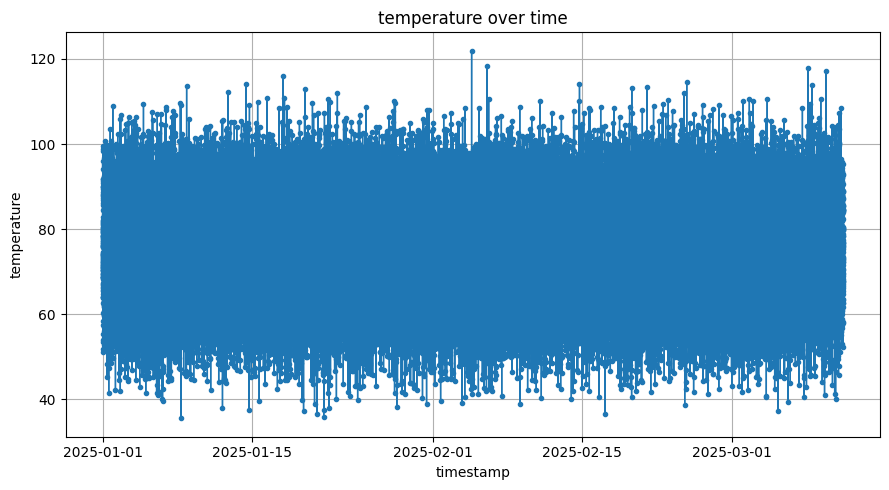

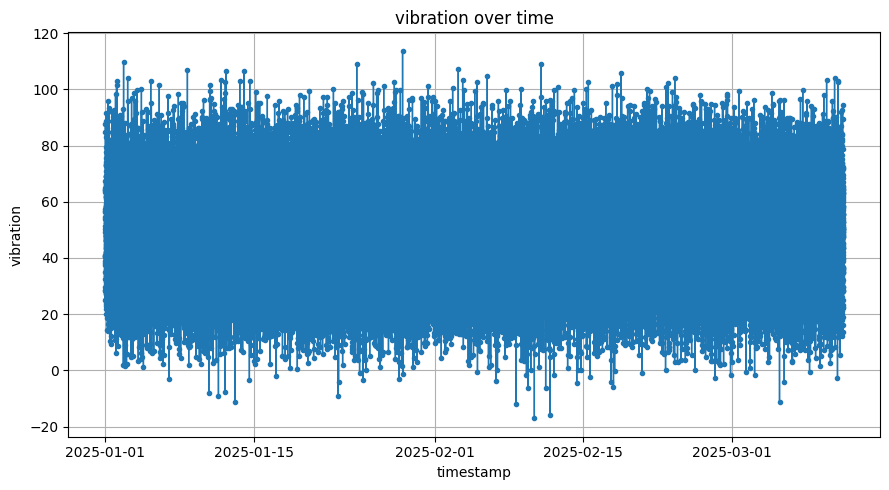

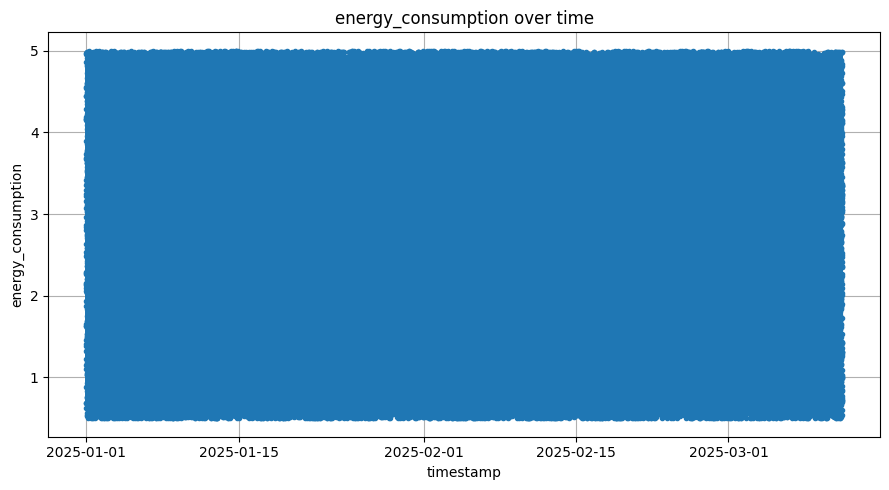

In [4]:
# If timestamp is present, plot a few signals over time
if 'timestamp' in df.columns:
    dft = df.sort_values('timestamp')
    for col in [c for c in ['temperature','vibration','energy_consumption'] if c in dft.columns]:
        plt.figure()
        plt.plot(dft['timestamp'], dft[col], marker='.', linewidth=1)
        plt.xlabel('timestamp'); plt.ylabel(col); plt.title(f'{col} over time')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


### ⏱️ Downtime Records 

Assumptions for **downtime** rows (no branching, just one boolean mask):
- `downtime_risk > 0` **or**
- `maintenance_required == 1` **or**
- `machine_status != 1` (i.e., anything not “running”)

What we show:
- A tidy **downtime table** with key columns
- **Top 10 machines** by downtime **count**
- A **daily downtime** trend (count per day)
- First 20 downtime rows for a quick peek

Downtime rows: 28473


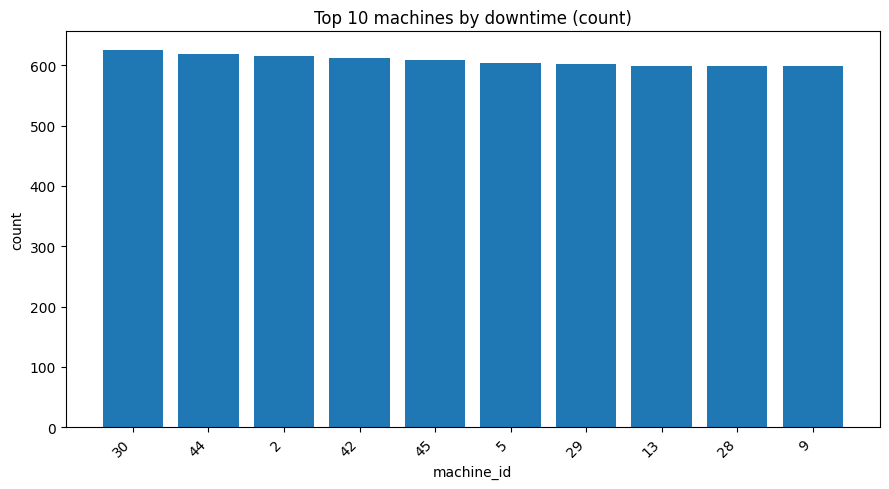

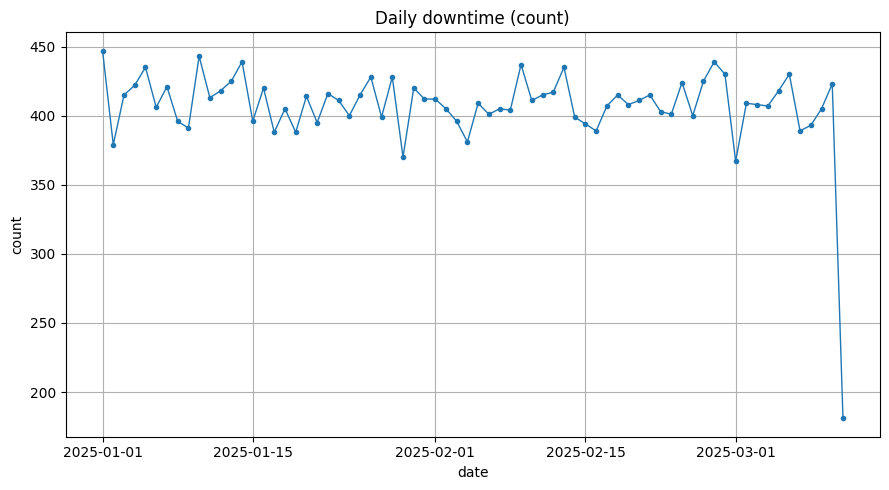

,timestamp,machine_id,failure_type,machine_status,downtime_risk,maintenance_required
2,2025-01-01 00:02:00,15,Normal,1,1.0,1
3,2025-01-01 00:03:00,43,Normal,1,1.0,1
4,2025-01-01 00:04:00,8,Vibration Issue,2,0.0,1
8,2025-01-01 00:08:00,23,Normal,1,1.0,1
9,2025-01-01 00:09:00,11,Normal,0,0.0,0
13,2025-01-01 00:13:00,40,Overheating,2,0.0,1
15,2025-01-01 00:15:00,3,Normal,1,1.0,1
17,2025-01-01 00:17:00,2,Normal,1,1.0,1
18,2025-01-01 00:18:00,24,Normal,1,1.0,1
21,2025-01-01 00:21:00,38,Normal,1,1.0,1


In [5]:
# Parse timestamps (simple and direct)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Downtime mask (single expression; no if/else)
downtime_mask = (df['downtime_risk'] > 0) | (df['maintenance_required'] == 1) | (df['machine_status'] != 1)

# Compact downtime view (sorted chronologically)
cols = ['timestamp','machine_id','failure_type','machine_status','downtime_risk','maintenance_required']
downtime_df = df.loc[downtime_mask, cols].sort_values('timestamp')

print(f"Downtime rows: {len(downtime_df)}")

# Top machines by downtime count
top_machines = downtime_df.groupby('machine_id').size().sort_values(ascending=False).head(10)
plt.figure()
plt.bar(top_machines.index.astype(str), top_machines.values)
plt.title('Top 10 machines by downtime (count)')
plt.xlabel('machine_id'); plt.ylabel('count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Daily downtime trend (count per day)
daily = (downtime_df
         .set_index('timestamp')
         .assign(_=1)['_']
         .resample('D')
         .sum())

plt.figure()
plt.plot(daily.index, daily.values, marker='.', linewidth=1)
plt.title('Daily downtime (count)')
plt.xlabel('date'); plt.ylabel('count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Preview first 20 downtime rows
downtime_df.head(20)

### 🚦 Basic state changes (start/stop/error)

#### 🔍 How state changes are detected

1. **Status labeling**  
   - We interpret `machine_status` numerically where possible with this mapping:  
     `0 → idle`, `1 → running`, `2 → error`.  
   - If `machine_status` is already a string (e.g., `"running"`), we keep it as-is.

2. **Per-machine ordering**  
   - If `machine_id` exists, we **group by machine** so each asset’s timeline is evaluated independently.  
   - Within each group we **sort by `timestamp`** to ensure chronological order.

3. **Transition detection**  
   - Compute `prev = machine_status_label.shift(1)` and `cur = machine_status_label`.  
   - A **state change** occurs where `prev != cur` (ignoring the very first row which has no previous value).

4. **Event classification**  
   - `start`: when `cur == 'running'` and the previous state wasn’t `running`.  
   - `stop`: when `cur == 'idle'` and the previous state **was** `running`.  
   - `error`: when `cur == 'error'` and the previous state wasn’t `error`.  
   - otherwise: `state_change` (other transitions, e.g., `idle → idle` is ignored; `idle → unknown` would be labeled generically).

5. **Output**  
   - A compact events table with columns: `timestamp`, `machine_id`, `event`, `from`, `to`.

> 📝 **Notes**:  
> - This is a minimal heuristic; adjust the label map if your system uses different codes.  
> - Ensure timestamps are in a consistent timezone/order for best results.


In [6]:
# Heuristic map for machine_status if it's numeric-like: 0=idle, 1=running, 2=error
if 'machine_status' in df.columns:
    ms_num = pd.to_numeric(df['machine_status'], errors='coerce')
    label_map = {0:'idle', 1:'running', 2:'error'}
    df['machine_status_label'] = ms_num.map(label_map).fillna(df['machine_status'].astype(str))

def extract_transitions(dfi: pd.DataFrame):
    if 'timestamp' not in dfi.columns or 'machine_status_label' not in dfi.columns:
        return pd.DataFrame(columns=['timestamp','machine_id','event','from','to'])
    dfi = dfi.sort_values('timestamp')
    prev = dfi['machine_status_label'].shift(1)
    cur  = dfi['machine_status_label']
    mask = prev != cur
    events = []
    for i, row in dfi[mask].iterrows():
        fr = prev.loc[i]; to = cur.loc[i]
        if pd.isna(fr): 
            continue
        if to == 'running' and fr != 'running':
            ev = 'start'
        elif to == 'idle' and fr == 'running':
            ev = 'stop'
        elif to == 'error' and fr != 'error':
            ev = 'error'
        else:
            ev = 'state_change'
        events.append({
            'timestamp': row.get('timestamp', pd.NaT),
            'machine_id': row.get('machine_id', np.nan),
            'event': ev, 'from': fr, 'to': to
        })
    return pd.DataFrame(events)

if 'machine_status' in df.columns:
    if 'machine_id' in df.columns:
        ev_parts = []
        for mid, g in df.groupby('machine_id'):
            ev_parts.append(extract_transitions(g.assign(machine_id=mid)))
        events_df = pd.concat(ev_parts, ignore_index=True) if ev_parts else pd.DataFrame()
    else:
        events_df = extract_transitions(df.copy())
    print("\nEvents detected:", len(events_df))
    display(events_df.head(20))
else:
    print("machine_status column not found — skipping event extraction.")



Events detected: 33726


,timestamp,machine_id,event,from,to
0,2025-01-01 03:43:00,1,error,running,error
1,2025-01-01 04:24:00,1,start,error,running
2,2025-01-01 08:59:00,1,error,running,error
3,2025-01-01 11:05:00,1,start,error,running
4,2025-01-01 18:15:00,1,error,running,error
5,2025-01-01 20:32:00,1,start,error,running
6,2025-01-02 12:19:00,1,error,running,error
7,2025-01-02 12:54:00,1,start,error,running
8,2025-01-02 14:04:00,1,error,running,error
9,2025-01-02 14:10:00,1,start,error,running


### 🚨 Simple alarms & faults

#### 🔔 How the simple alarm rows are selected

We build a **boolean mask** (`alarm_flag`) using a **logical OR** across these signals:

- `anomaly_flag == 1`  
- `downtime_risk > 0`  
- `maintenance_required == 1`  
- `failure_type != 'Normal'` (case-insensitive)

Implementation details:
- Numeric fields are coerced with `pd.to_numeric(..., errors='coerce')` to avoid parsing issues.  
- If a column is missing, its condition is simply skipped.  
- The final mask is the OR of all available conditions.

**What you see in the output:**  
- A compact **alarm log** with columns like `timestamp`, `machine_id`, `failure_type`, the flags, and `machine_status(_label)` when present.  
- (Optional) You can sort by `timestamp` and/or export to CSV.

> 💡 **Customize**:  
> - Tighten or relax rules (e.g., add thresholds for `temperature`/`vibration`).  
> - Add **AND** conditions or debounce windows to reduce noise/false positives.

In [7]:
def alarm_mask(dfi: pd.DataFrame):
    conds = []
    if 'anomaly_flag' in dfi.columns:
        conds.append(pd.to_numeric(dfi['anomaly_flag'], errors='coerce') == 1)
    if 'downtime_risk' in dfi.columns:
        conds.append(pd.to_numeric(dfi['downtime_risk'], errors='coerce') > 0)
    if 'maintenance_required' in dfi.columns:
        conds.append(pd.to_numeric(dfi['maintenance_required'], errors='coerce') == 1)
    if 'failure_type' in dfi.columns:
        conds.append(dfi['failure_type'].astype(str).str.lower() != 'normal')
    if not conds:
        return pd.Series(False, index=dfi.index)
    m = conds[0]
    for c in conds[1:]:
        m = m | c
    return m

am = alarm_mask(df)
if am.any():
    cols = [c for c in ['timestamp','machine_id','failure_type','anomaly_flag','downtime_risk','maintenance_required','machine_status','machine_status_label'] if c in df.columns]
    display(df.loc[am, cols].head(20).sort_values(by=[c for c in ['timestamp'] if c in cols]))
else:
    print("No alarm-like rows found by simple rules.")

,timestamp,machine_id,failure_type,anomaly_flag,downtime_risk,maintenance_required,machine_status,machine_status_label
2,2025-01-01 00:02:00,15,Normal,1,1.0,1,1,running
3,2025-01-01 00:03:00,43,Normal,1,1.0,1,1,running
4,2025-01-01 00:04:00,8,Vibration Issue,0,0.0,1,2,error
8,2025-01-01 00:08:00,23,Normal,1,1.0,1,1,running
13,2025-01-01 00:13:00,40,Overheating,0,0.0,1,2,error
15,2025-01-01 00:15:00,3,Normal,1,1.0,1,1,running
17,2025-01-01 00:17:00,2,Normal,1,1.0,1,1,running
18,2025-01-01 00:18:00,24,Normal,1,1.0,1,1,running
21,2025-01-01 00:21:00,38,Normal,1,1.0,1,1,running
23,2025-01-01 00:23:00,21,Vibration Issue,0,0.0,1,2,error
